In [1]:
%load_ext autoreload
%autoreload 2


** Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

### Install dependencies

In [2]:
from helper import plot_images, color_hist, bin_spatial
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
import numpy as np

In [3]:
images = glob.glob('data/*/*/*.jpeg')
cars = []
not_cars = []
print(len(images))

2321


In [4]:
for image in images:
    if 'image' in image or 'extra' in image:
        not_cars.append(image)
    else:
        cars.append(image)
print(len(cars), len(not_cars))

1196 1125


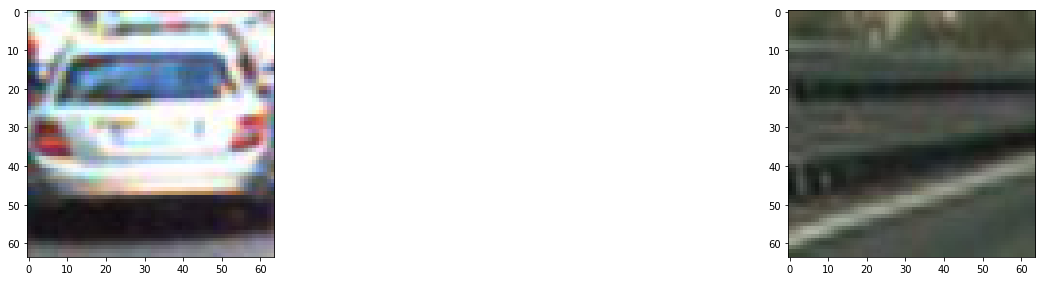

In [11]:
car_id = np.random.randint(0, len(cars))
not_car_id = np.random.randint(0, len(not_cars))

car_img = mpimg.imread(cars[car_id])
not_car_img = mpimg.imread(not_cars[not_car_id])

plot_images([car_img, not_car_img])

In [12]:
print(car_img.shape, not_car_img.shape)
print(car_img.dtype, not_car_img.dtype)

(64, 64, 3) (64, 64, 3)
uint8 uint8


## Explore vaious feature extraction

### Get histgram of color

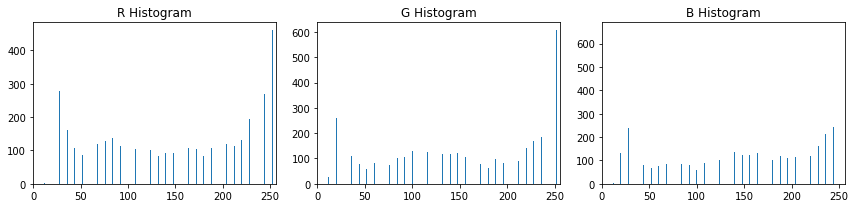

In [13]:
rh, gh, bh, bincen, feature_vec = color_hist(car_img, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()

### Spatial benning of color

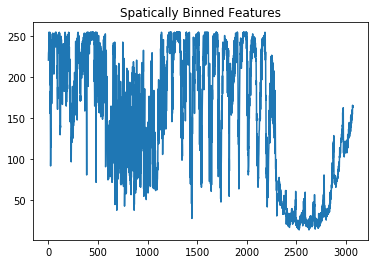

In [14]:
feature_vec = bin_spatial(car_img, color_space='RGB', size=(32, 32))
plt.plot(feature_vec)
plt.title('Spatically Binned Features')